In [1]:
import geopandas
import geoplot
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from tqdm import tqdm
from collections import *
import operator
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("taxi_cleaned.csv", header=0)
df_neighbourhoods = geopandas.read_file("Borough Boundaries.geojson")

In [3]:
data= data[(data.dropoff_latitude<= 41) & (data.dropoff_latitude>=40.4) & (data.dropoff_longitude>=-74.3) & (data.dropoff_longitude<=-73.6)]

In [4]:
lf = geopandas.GeoDataFrame(data, geometry= geopandas.points_from_xy(data.dropoff_longitude,data.dropoff_latitude ))


In [5]:
cini=lf.head(50)

In [10]:
df_neighbourhoods

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1186612476.77,462958.188213,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5,Staten Island,1623756421.84,325960.634597,(POLYGON ((-74.05050806403247 40.5664220341608...
2,3,Brooklyn,1937593021.46,738745.835869,"(POLYGON ((-73.867061494062 40.58208797679264,..."
3,4,Queens,3045885240.47,904390.137335,(POLYGON ((-73.83668274106707 40.5949466970158...
4,1,Manhattan,636602662.347,361212.479734,(POLYGON ((-74.01092841268031 40.6844914725429...


In [22]:
def update(data):
    gg=[]
    geo = df_neighbourhoods['geometry'][4]
    r=100000
    for index,row in data.iterrows():
        if(index==500000):
            print(index)
        elif (index==3000000):
            print(index)
        if (row['geometry'].within(geo) ):
            gg.append(1)
        else:
            gg.append(0)
            
    data['manhattan']=gg

In [31]:
def indate(data):
    gg=[]
    r=100000
    #geo = df_neighbourhoods['geometry'][4]
    for index,row in data.iterrows():
        if(index==r):
            print(index)
            r+=100000
        gg.append(row['geometry'])
    
    
            
    return gg

In [33]:
geo = df_neighbourhoods['geometry'][4]
last=[]

for i in (indate(lf)):
    if (i.within(geo) ):
        last.append(1)
    else:
        last.append(0)

    

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000


In [35]:
lf.shape

(6884711, 17)

In [36]:
len(last)

6884711

In [38]:
lf['Manhattan']= last

In [42]:
lf.groupby('Manhattan').size()

Manhattan
0     319940
1    6564771
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d4c9cc0>]],
      dtype=object)

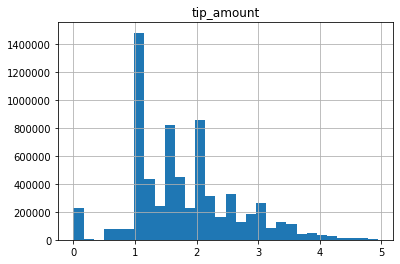

In [43]:
lf.hist(column='tip_amount',bins=30)

In [37]:
df_neighbourhoods

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2,Bronx,1186612476.77,462958.188213,(POLYGON ((-73.89680883223774 40.7958084451597...
1,5,Staten Island,1623756421.84,325960.634597,(POLYGON ((-74.05050806403247 40.5664220341608...
2,3,Brooklyn,1937593021.46,738745.835869,"(POLYGON ((-73.867061494062 40.58208797679264,..."
3,4,Queens,3045885240.47,904390.137335,(POLYGON ((-73.83668274106707 40.5949466970158...
4,1,Manhattan,636602662.347,361212.479734,(POLYGON ((-74.01092841268031 40.6844914725429...


In [29]:
gg

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [46]:
lf.groupby('passenger_count')['tip_amount'].mean()

passenger_count
1    1.777365
2    1.801393
3    1.788876
4    1.790003
5    1.754265
Name: tip_amount, dtype: float64

In [53]:
lf.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'geometry', 'Manhattan'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(lf.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type','geometry' ,'vendor_id', 'pickup_datetime', 'dropoff_datetime']), lf['tip_amount'], test_size=0.30, random_state=5)

In [49]:
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV

In [57]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)

In [58]:
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.998032737436714 and the test score is 0.9979794407944924


In [59]:
betas = pd.Series(linreg.coef_, index=x_train.columns)
betas = betas.append(pd.Series({"Intercept": linreg.intercept_}))
print(betas)

passenger_count   -3.863863e-04
trip_distance      2.180648e-05
fare_amount       -9.967226e-01
surcharge         -9.967651e-01
mta_tax            1.110223e-16
tolls_amount      -9.867036e-01
total_amount       9.971647e-01
Manhattan          1.063474e-02
Intercept         -5.084110e-01
dtype: float64


In [62]:
def print_heavily_correlated_features(df, threshold=0.7):
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(x_train, 0.7)

total_amount       2
fare_amount        2
trip_distance      2
Manhattan          0
tolls_amount       0
surcharge          0
passenger_count    0
mta_tax           -1
dtype: int64


In [45]:
cini.groupby(['passenger_count','tip_amount']).size()

passenger_count  tip_amount
1                1.00          7
                 1.08          1
                 1.10          1
                 1.20          2
                 1.40          2
                 1.50          3
                 1.60          2
                 1.70          1
                 1.75          1
                 1.80          2
                 1.90          1
                 2.00          4
                 2.10          2
                 2.20          1
                 2.40          1
                 2.60          1
                 2.70          1
                 2.90          2
                 3.15          1
                 3.40          1
                 3.50          1
                 3.87          1
                 4.00          1
                 4.05          1
2                1.00          1
                 1.40          1
                 1.50          1
                 1.70          1
                 1.90          1
               

In [24]:
cini

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,geometry,bronx,manhattan
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90,POINT (-73.98222699999998 40.73179),0,1
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40,POINT (-73.96044899999998 40.763995),0,1
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00,POINT (-73.986626 40.765217),0,1
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20,POINT (-73.97986299999998 40.77705),0,1
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75,POINT (-73.98436700000001 40.720524),0,1
5,CMT,2014-01-09 20:45:07,2014-01-09 20:51:01,1,0.9,-73.983811,40.749655,-73.989747,40.756575,CRD,6.0,0.5,0.5,1.40,0.0,8.40,POINT (-73.98974699999998 40.756575),0,1
6,CMT,2014-01-09 20:43:23,2014-01-09 20:52:07,1,2.1,-73.979906,40.745850,-73.959090,40.773639,CRD,9.0,0.5,0.5,2.00,0.0,12.00,POINT (-73.95909 40.773639),0,1
7,CMT,2014-01-09 20:43:04,2014-01-09 20:54:29,1,3.4,-73.981147,40.758918,-73.942510,40.785975,CRD,12.0,0.5,0.5,2.60,0.0,15.60,POINT (-73.94251 40.785975),0,1
8,CMT,2014-01-09 20:50:23,2014-01-09 20:58:10,1,2.3,-73.955193,40.765468,-73.979023,40.740578,CRD,9.0,0.5,0.5,1.00,0.0,11.00,POINT (-73.979023 40.740578),0,1
9,CMT,2014-01-09 20:48:04,2014-01-09 21:01:37,1,3.3,-73.991782,40.748911,-73.988359,40.714205,CRD,12.5,0.5,0.5,4.05,0.0,17.55,POINT (-73.988359 40.714205),0,1
